# <center>        **Introduction to Data Science (S2-22_DSECLZG532)-ASSIGNMENT**</center>

## Group No

## Group Member Names:
1. SANKHABRATA BURMAN
2. NALLI CHAITANYA VISHAL
3. ASHISH KUMAR
4. SHRISHTI SINGH

# 1. Business Understanding

Students are expected to identify an analytical problem of your choice. You have to detail the Business Understanding part of your problem under this heading which basically addresses the following questions.

   1. What is the business problem that you are trying to solve?
   2. What data do you need to answer the above problem?
   3. What are the different sources of data?
   4. What kind of analytics task are you performing?

Score: 1 Mark in total (0.25 mark each)

--------------Type the answers below this line--------------
## ----Business Understanding: --------------
Ans#1: The dataset contains data related to hotel bookings. 
Booking Cancellation Prediction → is_canceled (0 = Not Canceled, 1 = Canceled)
If the goal is to predict whether a booking will be canceled, this is the target variable.
A potential business problem could be:
"How can hotels optimize bookings, reduce cancellations, and improve customer satisfaction?"
This could involve understanding customer behavior, predicting cancellations, identifying peak booking periods, and optimizing pricing strategies.


Ans#2: Historical data set to analyze the trend and possible factors for cancellation and predcting cancellation.
Ans#3: Currently the dataset is sourced from public domain. But in real world scenario, data source could be the DataBase, real time streaming datasource, etc.
Ans#4: Predevtive Analysis & Clustering

# 2. Data Acquisition

For the problem identified , find an appropriate data set (Your data set must
be unique with minimum **20 features and 10k rows**) from any public data source.

---



## 2.1 Download the data directly



In [1]:
##---------Type the code below this line------------------##
# 1. Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


## 2.2 Code for converting the above downloaded data into a dataframe

In [2]:
##---------Type the code below this line------------------##
df = pd.read_csv('https://raw.githubusercontent.com/sankhaburman/datascience_project/refs/heads/main/hotel_bookings.csv')


## 2.3 Confirm the data has been correctly by displaying the first 5 and last 5 records.

In [3]:
##---------Type the code below this line------------------##
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015


## 2.4 Display the column headings, statistical information, description and statistical summary of the data.

In [4]:
##---------Type the code below this line------------------##

##---------Start: Statistics of Numeric data --------------------##
df.describe(include="all")

# 1. Size of the dataset (rows, columns)
print("Dataset Size:", df.shape)

# 2. Data types of attributes
print("\nData Types of Attributes:")
print(df.dtypes)

# 3. Checking for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Dataset Size: (115737, 32)

Data Types of Attributes:
hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type          

C:\Users\Sankha\AppData\Local\Temp\ipykernel_51760\531986534.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="hotel", palette="coolwarm")


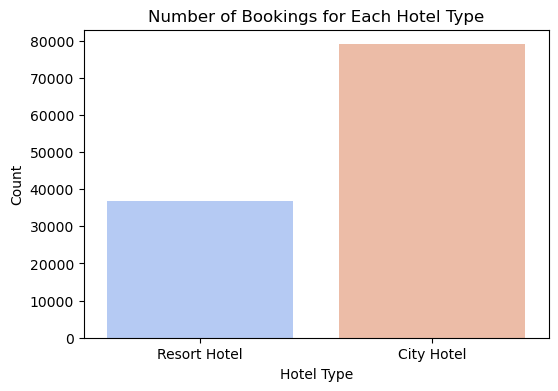

C:\Users\Sankha\AppData\Local\Temp\ipykernel_51760\531986534.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="is_canceled", palette="viridis")


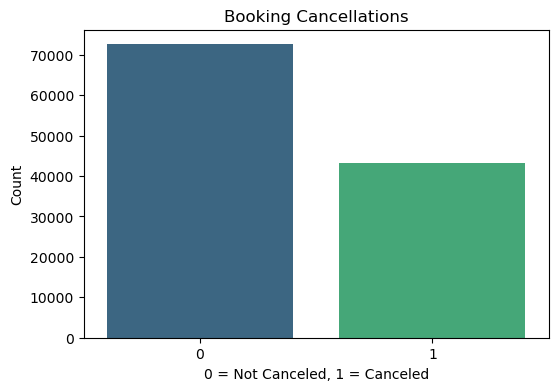

C:\Users\Sankha\AppData\Local\Temp\ipykernel_51760\531986534.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="arrival_date_month", order=['January', 'February', 'March', 'April', 'May', 'June',


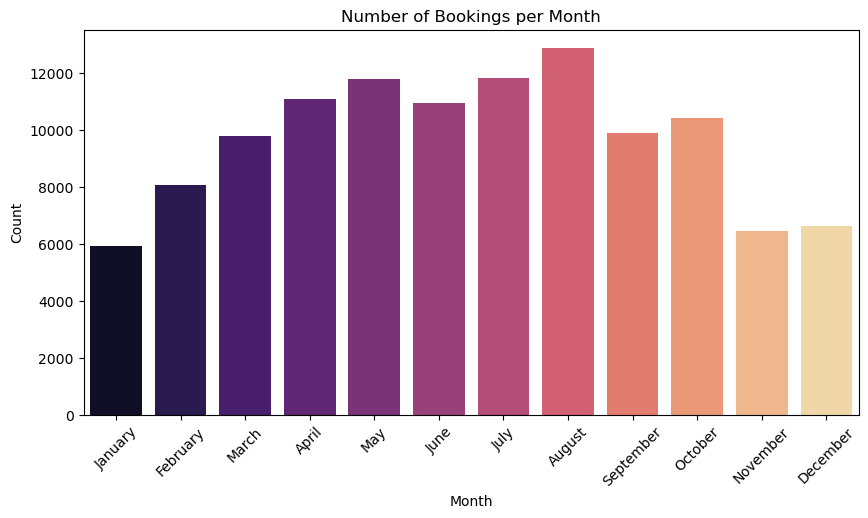

C:\Users\Sankha\AppData\Local\Temp\ipykernel_51760\531986534.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="arrival_date_month", y="adr", order=['January', 'February', 'March', 'April', 'May', 'June',


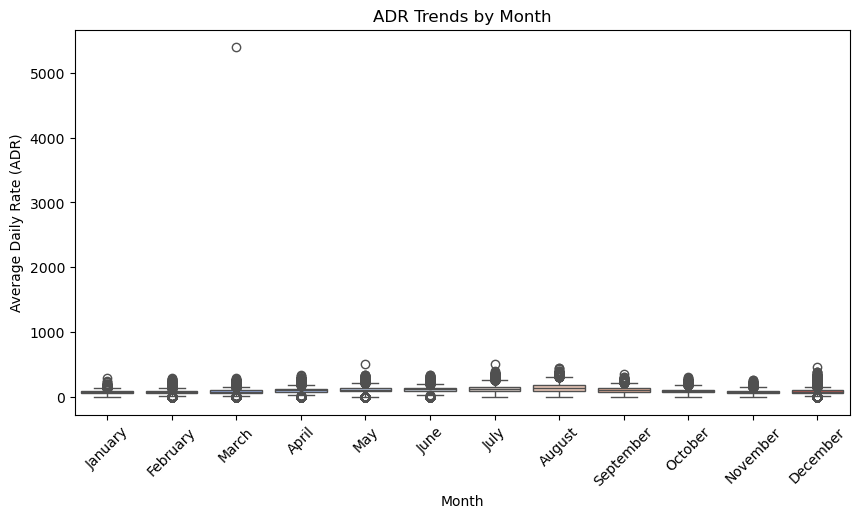

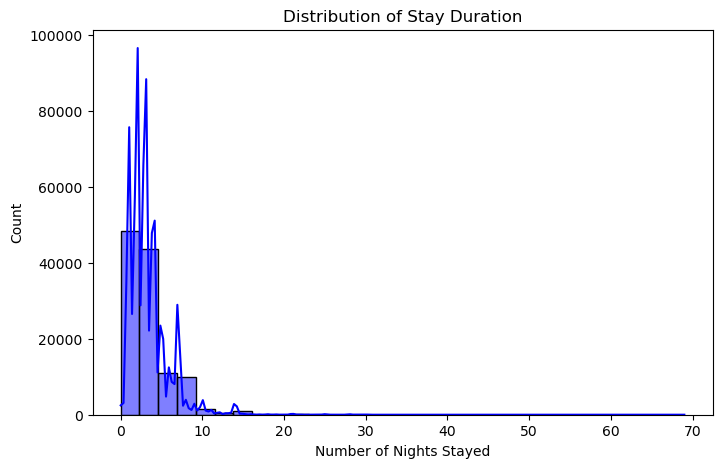

In [5]:
# Booking distribution between City Hotel and Resort Hotel
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="hotel", palette="coolwarm")
plt.title("Number of Bookings for Each Hotel Type")
plt.xlabel("Hotel Type")
plt.ylabel("Count")
plt.show()

# Cancellation rate
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="is_canceled", palette="viridis")
plt.title("Booking Cancellations")
plt.xlabel("0 = Not Canceled, 1 = Canceled")
plt.ylabel("Count")
plt.show()

# Bookings by month
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="arrival_date_month", order=['January', 'February', 'March', 'April', 'May', 'June',
                                                      'July', 'August', 'September', 'October', 'November', 'December'],
              palette="magma")
plt.title("Number of Bookings per Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Average Daily Rate (ADR) trends by month
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="arrival_date_month", y="adr", order=['January', 'February', 'March', 'April', 'May', 'June',
                                                             'July', 'August', 'September', 'October', 'November', 'December'],
            palette="coolwarm")
plt.title("ADR Trends by Month")
plt.xlabel("Month")
plt.ylabel("Average Daily Rate (ADR)")
plt.xticks(rotation=45)
plt.show()

# Stay duration analysis
df["total_stay"] = df["stays_in_weekend_nights"] + df["stays_in_week_nights"]
plt.figure(figsize=(8, 5))
sns.histplot(df["total_stay"], bins=30, kde=True, color="blue")
plt.title("Distribution of Stay Duration")
plt.xlabel("Number of Nights Stayed")
plt.ylabel("Count")
plt.show()

## 2.5 Write your observations from the above.
1. Size of the dataset
2. What type of data attributes are there?
3. Is there any null data that has to be cleaned?

Score: 2 Marks in total (0.25 marks for 2.1, 0.25 marks for 2.2, 0.5 marks for 2.3, 0.25 marks for 2.4, 0.75 marks for 2.5)

## --------------Type the answers below this line--------------
## ----2.5 Observations: --------------
Ans#1. Row count=115737, Column count=32
Ans#2. Datatypes present are: dtypes: float64(4), int64(16), object(16)
Ans#3. Null Data That Needs Cleaning
            children → 4 missing values
            country → 487 missing values
            agent → 15,814 missing values
            company → 109,132 missing values

Booking Trends
The dataset contains two types of hotels: City Hotel and Resort Hotel.
City Hotels have higher booking volume compared to Resort Hotels.
The most common arrival months for bookings are typically summer months (June–August).
2. Cancellations Analysis
Cancellation rate is significant, meaning a large percentage of customers cancel their bookings.
Longer lead times (time between booking and arrival) increase cancellation chances.
No deposit bookings tend to have higher cancellation rates than prepaid ones.

# 3. Data Preparation

## 3.1 Check for

* duplicate data
* missing data
* data inconsistencies


In [6]:
##---------Type the code below this line------------------##
# 1. Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# 2. Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values[missing_values > 0])

# 3. Check for invalid values
# Example: Check for bookings with zero total guests
invalid_bookings = df[(df['adults'] + df['children'] + df['babies']) == 0]
print(f"\nNumber of invalid bookings (zero guests): {invalid_bookings.shape[0]}")

# 4. Check for inconsistent categorical values
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())
   

Number of duplicate rows: 31446

Missing values in each column:
children         4
country        487
agent        15814
company     109132
dtype: int64

Number of invalid bookings (zero guests): 177

Unique values in 'hotel':
['Resort Hotel' 'City Hotel']

Unique values in 'arrival_date_month':
['July' 'November' 'December' 'January' 'February' 'March' 'April' 'May'
 'June' 'August' 'September' 'October']

Unique values in 'meal':
['BB' 'FB' 'HB' 'Undefined' 'SC']

Unique values in 'country':
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'ITA' 'CRI' 'FRA' 'RUS' 'ARG' 'DEU' 'BRA'
 'KOR' 'DNK' 'CHN' 'NLD' 'HUN' nan 'POL' 'CN' 'BEL' 'LUX' 'AUT' 'CHE'
 'ARE' 'FIN' 'TUN' 'NOR' 'ROU' 'JAM' 'ALB' 'AUS' 'SWE' 'HRV' 'HKG' 'IND'
 'ISR' 'CZE' 'IRN' 'GEO' 'DZA' 'MAR' 'AND' 'TUR' 'MOZ' 'ZAF' 'GIB' 'URY'
 'BLR' 'EST' 'LTU' 'JEY' 'CAF' 'CYP' 'GRC' 'LVA' 'COL' 'GGY' 'KWT' 'NGA'
 'CHL' 'MDV' 'VEN' 'SVK' 'AGO' 'FJI' 'KAZ' 'PAK' 'IDN' 'SVN' 'LBN' 'PHL'
 'SEN' 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'OMN' 'DOM' 'MKD' 'PRI' 'MYS'

## 3.2 Apply techiniques
* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies


In [7]:
##---------Type the code below this line------------------##
##----Removal of duplicate rows -----##
if duplicates.size > 0:
    df = df.drop_duplicates()
    print('Modified dataset', df.shape)

# Fix data inconsistencies
df["adr"] = df["adr"].apply(lambda x: max(x, 0))  # Ensure ADR is non-negative

index_zero_guest_index = df[(df['adults'] + df['children'] + df['babies']) == 0].index 
# drop these row indexes  from dataFrame 
df.drop(index_zero_guest_index, inplace = True) 

# Dropping company colmumn as most of values are null
df = df.drop('company', axis=1)
df = df.drop('reservation_status_date', axis=1)
df = df.drop('reservation_status', axis=1)

# Step 2: Handle missing values (Imputation)
df['children'].fillna(0, inplace=True)  # Assume missing children values mean 0
df['country'].fillna('Unknown', inplace=True)  # Fill missing country with 'Unknown'
df['agent'].fillna(0, inplace=True)  # Assume missing agent means no agent involved



## ---Check for missing values
df.isnull().sum()



Modified dataset (84291, 33)


C:\Users\Sankha\AppData\Local\Temp\ipykernel_51760\2245116760.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['children'].fillna(0, inplace=True)  # Assume missing children values mean 0
C:\Users\Sankha\AppData\Local\Temp\ipykernel_51760\2245116760.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

## 3.3 Encode categorical data

In [8]:
##---------Type the code below this line------------------##
## Label Encoding customer_type
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["customer_type"] = label_encoder.fit_transform(df["customer_type"])

## Label Encoding reservation_status categorical attribute
#df["reservation_status"] = label_encoder.fit_transform(df["reservation_status"])

## Label Encodng arrival_date_month categorical attribute
# Manually mapping month names to numbers
month_mapping = {
    "January": 1, "February": 2, "March": 3, "April": 4,
    "May": 5, "June": 6, "July": 7, "August": 8,
    "September": 9, "October": 10, "November": 11, "December": 12
}

# Apply the mapping to convert month names to numbers
df["arrival_date_month"] = df["arrival_date_month"].map(month_mapping)

## Label Encodng hotel categorical attribute
df["hotel"] = label_encoder.fit_transform(df["hotel"])

## Label Encodng meal categorical attribute
df["meal"] = label_encoder.fit_transform(df["meal"])

## Label Encoding country categorical attribute
df["country"] = label_encoder.fit_transform(df["country"])

## Label Encoding market_segment categorical attribute
df["market_segment"] = label_encoder.fit_transform(df["market_segment"])

## Label Encoding distribution_channel categorical attribute
df["distribution_channel"] = label_encoder.fit_transform(df["distribution_channel"])

## Label Encoding deposit_type categorical attribute
df["deposit_type"] = label_encoder.fit_transform(df["deposit_type"])

## Label Encoding reserved_room_type categorical attribute
df["reserved_room_type"] = label_encoder.fit_transform(df["reserved_room_type"])

## Label Encoding assigned_room_type categorical attribute
df["assigned_room_type"] = label_encoder.fit_transform(df["assigned_room_type"])


print("Size of DataSet:",df.shape)

df.head()


Size of DataSet: (84128, 30)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_stay
0,1,0,342,2015,7,27,1,0,0,2,...,2,3,0,0.0,0,2,0.0,0,0,0
1,1,0,737,2015,7,27,1,0,0,2,...,2,4,0,0.0,0,2,0.0,0,0,0
2,1,0,7,2015,7,27,1,0,1,1,...,2,0,0,0.0,0,2,75.0,0,0,1
3,1,0,13,2015,7,27,1,0,1,1,...,0,0,0,304.0,0,2,75.0,0,0,1
4,1,0,14,2015,7,27,1,0,2,2,...,0,0,0,240.0,0,2,98.0,0,1,2


## ----Missing value remediation: --------------
##---- Replace by mean: -------    1.agents"15814
" missing data,fill empty rows with zeron2.
"country":4871 missing data,Fill missing country with 'Unknownn3.
"children": 4 missing data,fill empty rows with zero
4."company": 109132 missing data, dropped comany column
5. Drop rows with zero guest: index_zero_guest_index = df[(df['adults'] + df['children'] + df['babies']) == 0].indexn

In [9]:
# Step 2: Handle missing values (Imputation)
#df_cleaned['children'].fillna(0, inplace=True)  # Assume missing children values mean 0
#df_cleaned['country'].fillna('Unknown', inplace=True)  # Fill missing country with 'Unknown'
#df_cleaned['agent'].fillna(0, inplace=True)  # Assume missing agent means no agent involved
#df_cleaned['company'].fillna(0, inplace=True)  # Assume missing company means no company involved
#--Deal with missing data
#avg_agent_value = df["agent"].astype("float64").mean(axis=0)
#print("Average of agent data:", avg_agent_value)
#df['agent'] = df['agent'].replace(np.nan, avg_agent_value)
df['agent'].fillna(0, inplace=True)  # Assume missing agent means no agent involved


#country_value = df["country"].astype("int64").mean(axis=0)
#print("Average of country data:", country_value)
#df["country"].fillna(country_value)
#df['country'].fillna('Unknown', inplace=True)  # Fill missing country with 'Unknown'
df['country'].fillna(df['country'].mode()[0], inplace=True)


df['children'].fillna(0, inplace=True)  # Assume missing children values mean 0
#children_value = df["children"].astype("float64").min(axis=0)
#print("Average of children data:", children_value)
#df['children'] = df['children'].replace(np.nan, children_value)


##-- Normalize numerical attributes
numerical_cols = ['agent', 'adr','lead_time']
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

## ---Check for missing values
df.isnull().sum()
df.head(10)

C:\Users\Sankha\AppData\Local\Temp\ipykernel_51760\71440661.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['agent'].fillna(0, inplace=True)  # Assume missing agent means no agent involved
C:\Users\Sankha\AppData\Local\Temp\ipykernel_51760\71440661.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_stay
0,1,0,0.464043,2015,7,27,1,0,0,2,...,2,3,0,0.000000,0,2,0.000000,0,0,0
1,1,0,1.000000,2015,7,27,1,0,0,2,...,2,4,0,0.000000,0,2,0.000000,0,0,0
2,1,0,0.009498,2015,7,27,1,0,1,1,...,2,0,0,0.000000,0,2,0.013889,0,0,1
3,1,0,0.017639,2015,7,27,1,0,1,1,...,0,0,0,0.568224,0,2,0.013889,0,0,1
4,1,0,0.018996,2015,7,27,1,0,2,2,...,0,0,0,0.448598,0,2,0.018148,0,1,2
6,1,0,0.000000,2015,7,27,1,0,2,2,...,2,0,0,0.000000,0,2,0.019815,0,0,2
7,1,0,0.012212,2015,7,27,1,0,2,2,...,2,0,0,0.566355,0,2,0.019074,0,1,2
8,1,1,0.115332,2015,7,27,1,0,3,2,...,0,0,0,0.448598,0,2,0.015185,0,1,3
9,1,1,0.101764,2015,7,27,1,0,3,2,...,3,0,0,0.028037,0,2,0.019537,0,0,3
10,1,1,0.031208,2015,7,27,1,0,4,2,...,4,0,0,0.448598,0,2,0.022778,0,0,4


## 3.4 Report

Mention and justify the method adopted
* to remove duplicate data, if present
* to impute or remove missing data, if present
* to remove data inconsistencies, if present

OR for textdata
* How many tokens after step 3?
* how may tokens after stop words filtering?

If the any of the above are not present, then also add in the report below.

Score: 2 Marks (based on the dataset you have, the data prepreation you had to do and report typed, marks will be distributed between 3.1, 3.2, 3.3 and 3.4)

## ----Report 3.4 & Justification: --------------
#1: Removing Duplicate Data
Method Used:df = df.drop_duplicates()
Justification:
Duplicate data can lead to biased analysis and incorrect predictions.
drop_duplicates() ensures each record is unique, preventing redundancy in decision-making.

#2: Fixing Data Inconsistencies
Method Used: df["adr"] = df["adr"].apply(lambda x: max(x, 0))  # Ensuring ADR is non-negative
Having negative value is observed as a erronous data in "ADR" feature column as cost of hotel booking cannot be negative.

#3: Handling Missing Data
Method Used:df = df.drop_duplicates()
Justification": Standardization prevents errors in filtering, grouping, or machine learning models


In [10]:
##---------Type the code below this line------------------##
# Verify the cleaning process
cleaned_duplicate_count = df.duplicated().sum()
cleaned_missing_values = df.isnull().sum()
cleaned_inconsistent_values = (df["adr"] < 0).sum()

# Print results
print(f"Duplicate Rows After Cleaning: {cleaned_duplicate_count}")
print("Missing Values After Cleaning:\n", cleaned_missing_values)
print(f"Inconsistent 'adr' Values After Cleaning: {cleaned_inconsistent_values}")
df.info()


Duplicate Rows After Cleaning: 264
Missing Values After Cleaning:
 hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                    

In [11]:
##---------Type the code below this line------------------##

## 3.5 Identify the target variables.

* Separate the data from the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.

* Report the observations

Score: 1 Mark

In [12]:
##---------Type the code below this line------------------##
# Separate features (X) and target variable (y)
target_column = "is_canceled"  
X = df.drop(columns=['is_canceled'], axis=1)  # Features
y = df[target_column]  # Target variable

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (84128, 29)
Target shape: (84128,)


# 4. Data Exploration using various plots



## 4.1 Scatter plot of each quantitative attribute with the target.

Score: 1 Mark

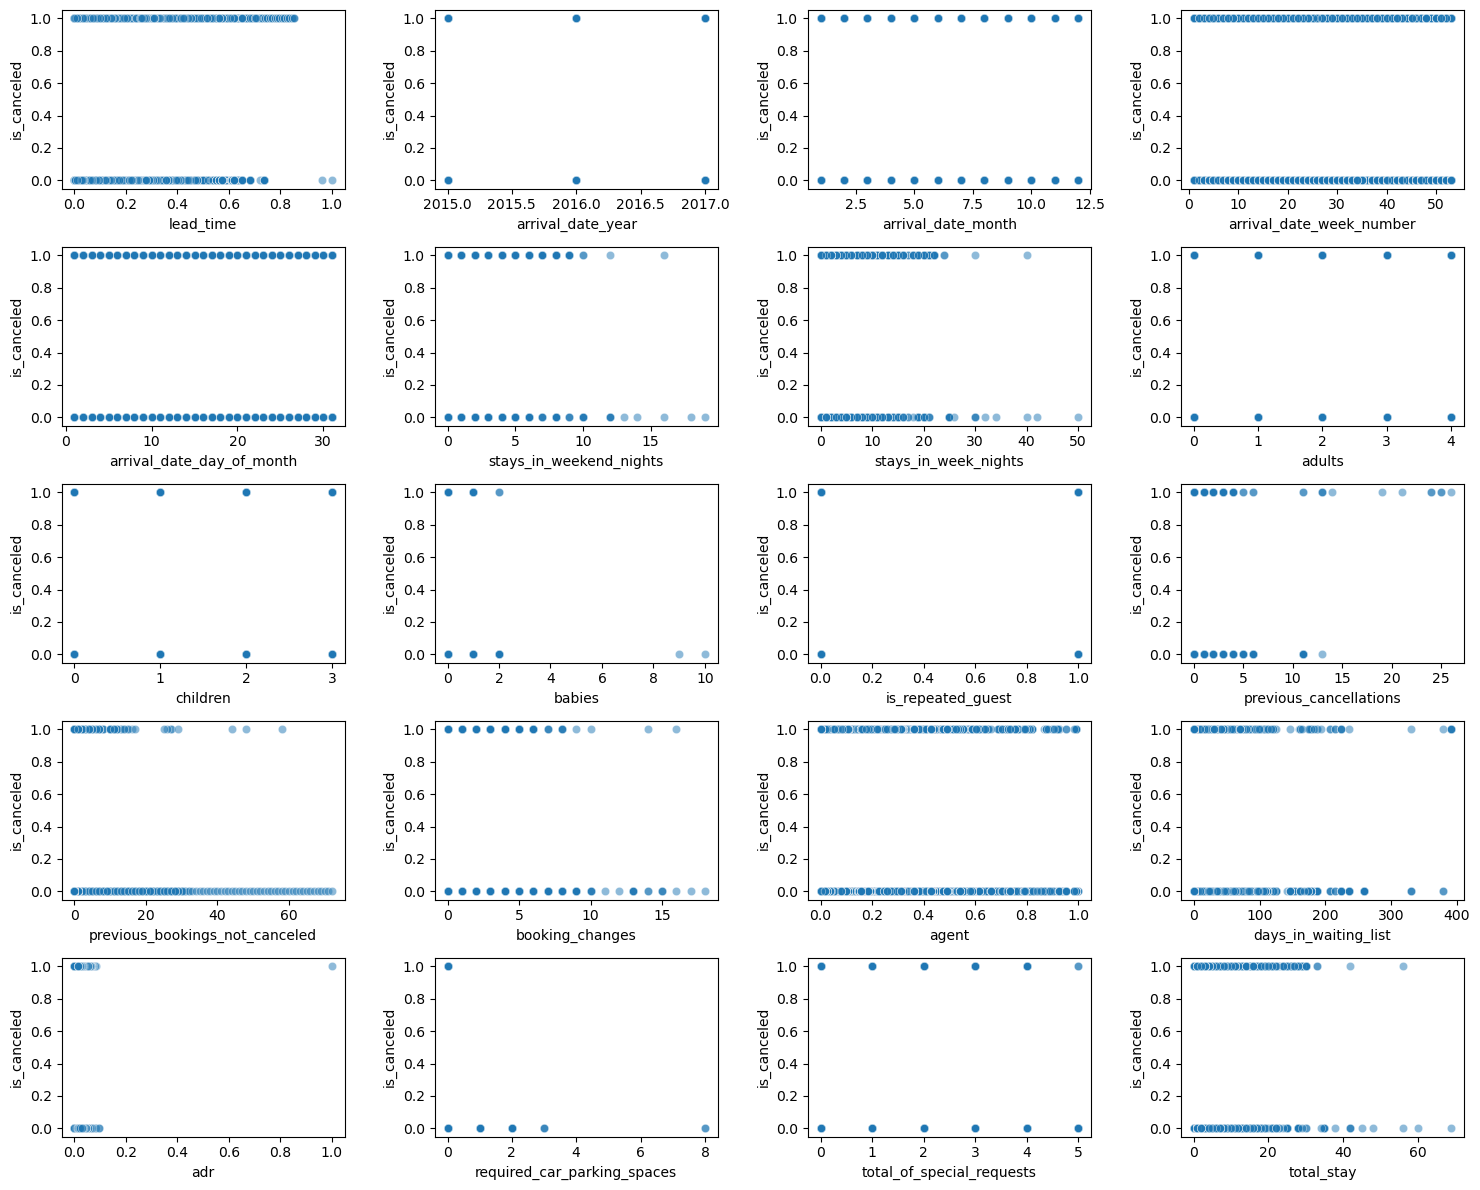

In [13]:
##---------Type the code below this line------------------##
# Identify numerical columns (excluding the target variable)
# Select numerical features excluding the target variable

numerical_features = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
numerical_features.remove("is_canceled")  # Remove target variable

# Create scatter plots
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(5, 4, i)  # Create a grid of subplots
    sns.scatterplot(x=df[col], y=df['is_canceled'], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('is_canceled')

plt.tight_layout()
plt.show()

## 4.2 EDA using visuals
* Use (minimum) 2 plots (pair plot, heat map, correlation plot, regression plot...) to identify the optimal set of attributes that can be used for classification.
* Name them, explain why you think they can be helpful in the task and perform the plot as well. Unless proper justification for the choice of plots given, no credit will be awarded.

Score: 2 Marks

## ----Answer 4.2 : Justification: --------------
 
HeatMap:
In this case, we are analyzing hotel booking data to predict cancellations (is_canceled).
The approach taken includes:
Heatmap (Feature Correlation Analysis)
## --Why? ---
A heatmap visualizes feature relationships using a correlation matrix.
High correlation (close to +1 or -1) suggests a strong relationship with the target, making those features useful for classification.
If two independent variables are highly correlated, one may be redundant.

## ----Pair Plot : Justification: --------------
A pairplot helps visualize how different features relate to each other and the target variable.
The color coding (hue=is_canceled) allows us to see if certain features form clear clusters, helping in classification.
Kernel Density Estimation (KDE) on the diagonal provides insight into how feature values are distributed.

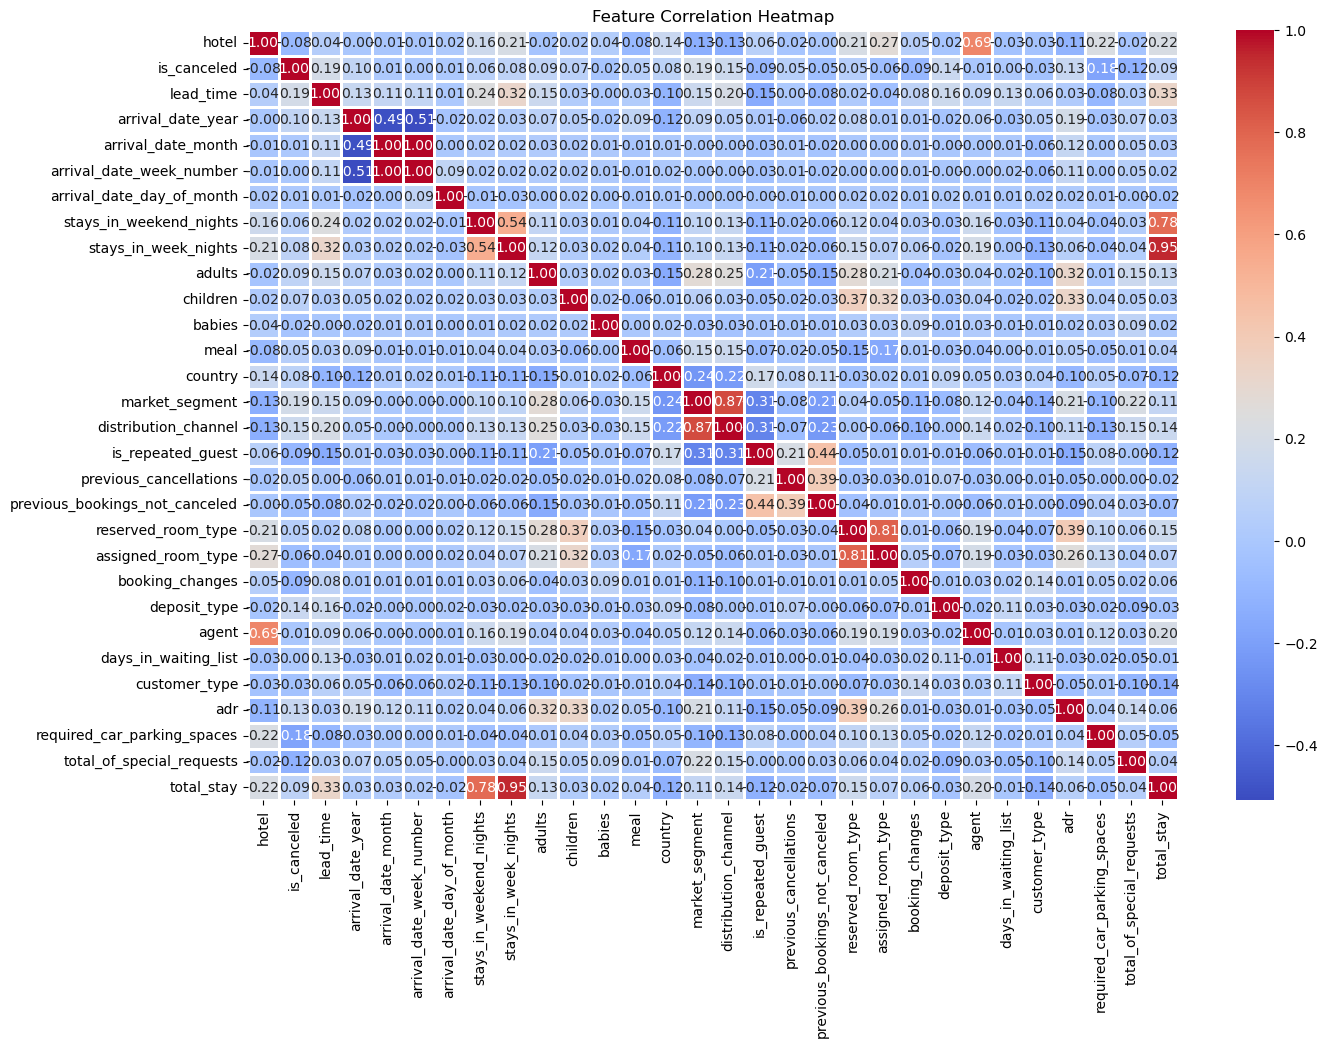

Top Correlated Features with is_canceled:
 is_canceled                       1.000000
lead_time                         0.187418
market_segment                    0.185291
required_car_parking_spaces       0.181851
distribution_channel              0.153911
deposit_type                      0.139366
adr                               0.125773
total_of_special_requests         0.123871
arrival_date_year                 0.100310
booking_changes                   0.092143
is_repeated_guest                 0.090444
adults                            0.088298
total_stay                        0.086296
stays_in_week_nights              0.084772
country                           0.079740
hotel                             0.079312
children                          0.067752
stays_in_weekend_nights           0.061551
assigned_room_type                0.059060
previous_bookings_not_canceled    0.053150
previous_cancellations            0.052437
reserved_room_type                0.048736
meal       

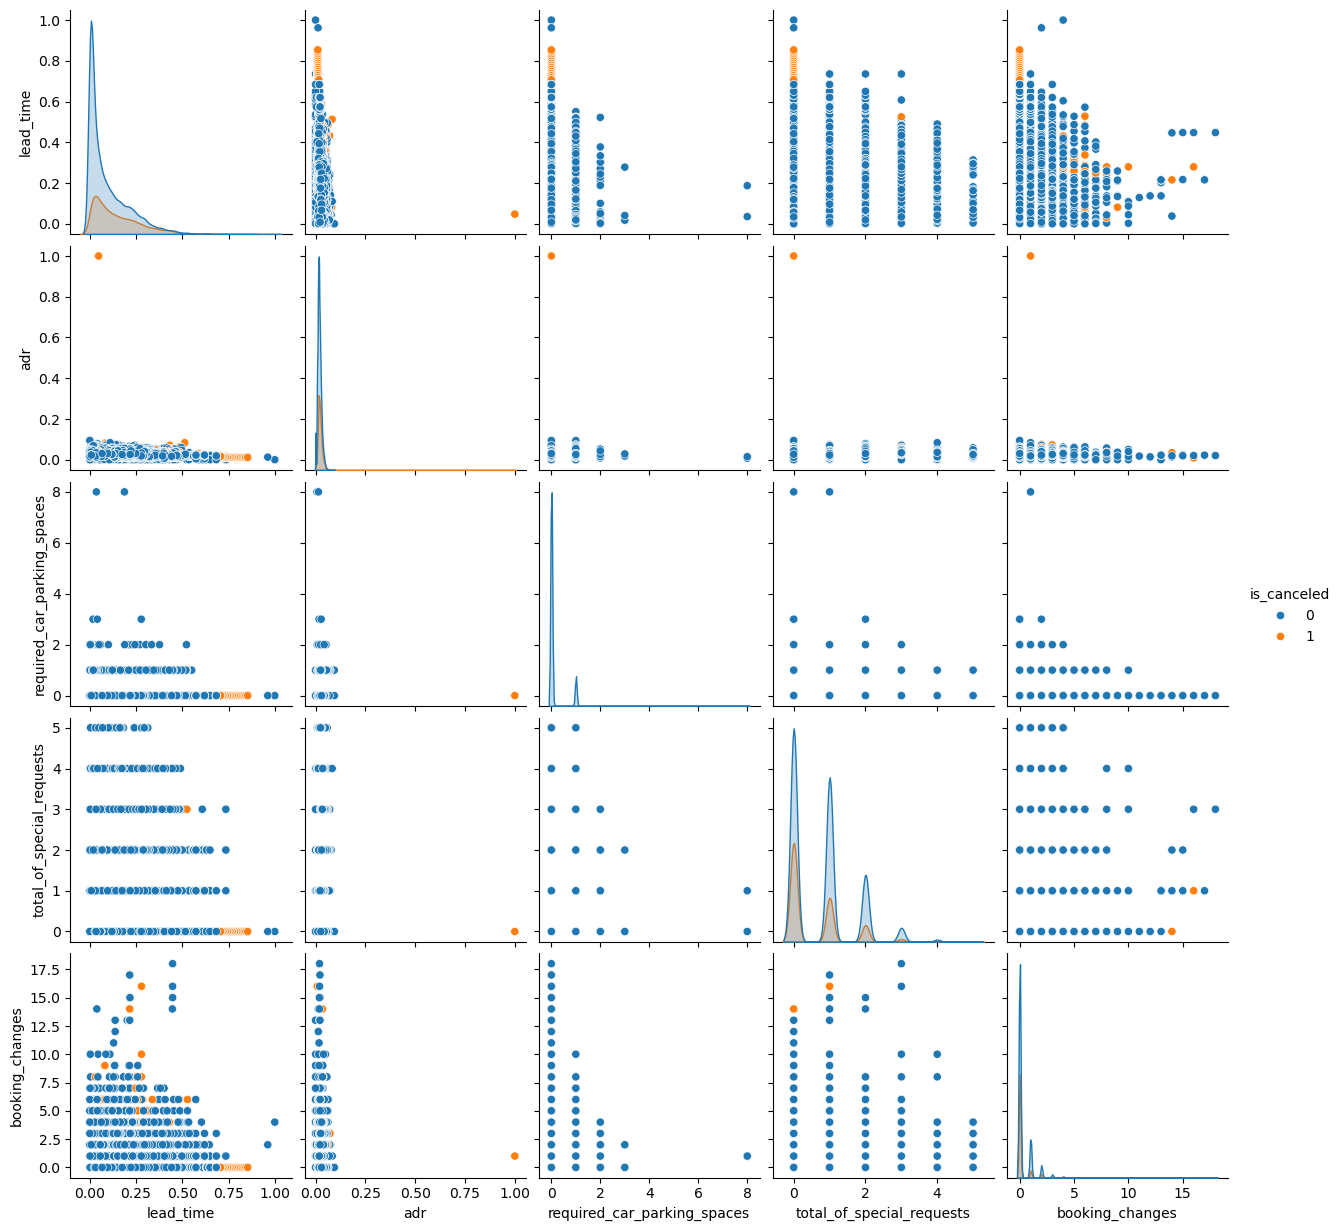

In [14]:
##---------Type the code below this line------------------##
# Compute the correlation matrix
corr_matrix = df.corr()
#---------------- Plot heatmap  ----------------------------
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.95)

# Highlight correlation with target variable
plt.title("Feature Correlation Heatmap")
plt.show()
## --------------------------------------------------------

# Identify top correlated features with the target variable
target_corr = corr_matrix["is_canceled"].abs().sort_values(ascending=False)
print("Top Correlated Features with is_canceled:\n", target_corr)

#--------------PAIR PLOT-----------------------
#selected_vars = ['lead_time', 'required_car_parking_spaces','market_segment','distribution_channel','deposit_type', 'adr',
#                 'total_of_special_requests', 'previous_bookings_not_canceled', 'booking_changes', 'previous_cancellations']
selected_vars = ['lead_time', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'booking_changes']
sns.pairplot(df, vars=selected_vars, hue="is_canceled")
plt.show()

# 5. Data Wrangling



## 5.1 Univariate Filters

#### Numerical and Categorical Data
* Identify top 5 significant features by evaluating each feature independently with respect to the target/other variable by exploring
1. Mutual Information (Information Gain)
2. Gini index
3. Gain Ratio
4. Chi-Squared test
5. Strenth of Association

(From the above 5 you are required to use only any <b>two</b>)



Score: 3 Marks

In [15]:
##---------Type the code below this line------------------##
## Chi-Squared test
categorical_features = df.select_dtypes(include=["int64"]).columns.tolist()
categorical_features.remove("is_canceled")  # Remove target variable
# --------Start:Perform Chi-Square test---------------------------------
chi_scores, p_values = chi2(df[categorical_features], df["is_canceled"])

# Create a DataFrame to store results
chi2_results = pd.DataFrame({"Feature": categorical_features, "Chi2 Score": chi_scores, "P-Value": p_values})

# Sort by Chi-Square score in descending order to get the most significant features
top_featuresDf = chi2_results.sort_values(by="Chi2 Score", ascending=False).head(5)

# Display the top 5 features
print(top_featuresDf)
pValue = top_featuresDf['P-Value'].values.tolist()

for pval in pValue:
    alpha = 0.05
    print("p value is " + str(pval))
    if pval <= alpha:
    	print('Dependent (reject H0)')
    else:
    	print('Independent (H0 holds true)')
## -------------ChiSquare Test End  -------------------------------------    

    


                           Feature   Chi2 Score        P-Value
10  previous_bookings_not_canceled  3876.427462   0.000000e+00
13     required_car_parking_spaces  2626.654283   0.000000e+00
11                 booking_changes  1340.196856  2.079614e-293
15                      total_stay  1287.473913  5.961096e-282
14       total_of_special_requests  1277.895675  7.191727e-280
p value is 0.0
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)
p value is 2.0796135119922785e-293
Dependent (reject H0)
p value is 5.9610957557050725e-282
Dependent (reject H0)
p value is 7.191726933580717e-280
Dependent (reject H0)


In [16]:
##----Gini Index for finding top 5 features --------------
# Label Encoding for categorical variables
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
categorical_cols = df.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Convert to string to handle NaN
    label_encoders[col] = le  # Store encoders for reference

# Define features and target
X = df.drop(columns=['is_canceled'])  # Exclude target variable
y = df['is_canceled']

# Remove 'reservation_status' since it dominated previous results
X_filtered = X.drop(columns=['reservation_status'], errors='ignore')

# Train Decision Tree using Gini Index
clf = DecisionTreeClassifier(criterion="gini", random_state=42)
clf.fit(X_filtered, y)

# Get feature importance scores
feature_importances = pd.Series(clf.feature_importances_, index=X_filtered.columns).sort_values(ascending=False)

# Get top 5 features
top_5_features = feature_importances.head(5)
print("Top 5 Significant Features:\n", top_5_features)

Top 5 Significant Features:
 lead_time                    0.158863
country                      0.136345
adr                          0.091719
total_of_special_requests    0.075601
arrival_date_day_of_month    0.066912
dtype: float64


## 5.2 Report observations

Write your observations from the results of each method. Clearly justify your choice of the method.

Score 1 mark

##---------Type the code below this line------------------##
## ----ChiSquare-------
## ----Answer 5.2: : Justification: --------------
Chi2 Score – Measures the dependency between the feature and the target (is_canceled).
Higher values indicate a stronger relationship with the target.
Features with higher scores are better for classification.
## --- P-Value – Indicates the statistical significance of the relationship ---
Lower values (< 0.05) mean the feature is highly significant in predicting cancellations.
Higher values (> 0.05) mean the feature has a weak or no significant impact.

## ------------Gini Index -----------------
Longer lead times (days between booking and check-in) increase cancellation likelihood.
This aligns with real-world trends where early bookings often cancel more frequently.
country (15.88%)

The guest's country of origin affects cancellation rates.
Possible reasons: travel restrictions, visa issues, or cancellation habits differing by region.
arrival_date_day_of_month (13.64%)

Certain days of the month might have higher cancellation rates.
Example: End-of-month salary cycles or peak/off-peak days affecting cancellations.
total_of_special_requests (7.5%)

Guests with more special requests may have a lower cancellation rate.
This suggests that guests invested in customization are more committed to their booking.

- Booking date and modification patterns matter.
- Long lead times correlate with higher cancellations.
- Country-specific trends impact booking behavior.
- Certain arrival dates might see more cancellations.
- Personalized bookings (with special requests) tend to stay.


# 6. Implement Machine Learning Techniques

Use any 2 ML tasks
1. Classification  

2. Clustering  

3. Association Analysis

4. Anomaly detection

You may use algorithms included in the course, e.g. Decision Tree, K-means etc. or an algorithm you learnt on your own with a brief explanation.
A clear justification have to be given for why a certain algorithm was chosen to address your problem.

Score: 4 Marks (2 marks each for each algorithm)

## 6.1 ML technique 1 + Justification

In [17]:
##---------Type the code below this line------------------##

##----------DecisionTree Algorithm -------------------------------##
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree

# Define the target variable
target = 'is_canceled'
# Select categorical and numerical features
categorical_features = ['market_segment', 'customer_type', 'country']
numerical_features = ['lead_time', 'total_of_special_requests', 'previous_cancellations', 'adr', 'required_car_parking_spaces','arrival_date_day_of_month']

# Define feature set (X) and target variable (y)
X = df[categorical_features + numerical_features]
y = df[target]

# Standardize numerical features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree classifier
clf = DecisionTreeClassifier(criterion="gini",max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix for :\n", confusion)
print(f"\nDecision Tree Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))



C:\Users\Sankha\AppData\Local\Temp\ipykernel_51760\3895985344.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_features] = scaler.fit_transform(X[numerical_features])


Confusion Matrix for :
 [[10669  1545]
 [ 2067  2545]]

Decision Tree Accuracy: 0.79

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.86     12214
           1       0.62      0.55      0.58      4612

    accuracy                           0.79     16826
   macro avg       0.73      0.71      0.72     16826
weighted avg       0.78      0.79      0.78     16826



# ------ 6.2 DesionTree Observations & Justifications ----
True Negatives (TN): 2545
False Positives (FP): 2067
False Negatives (FN): 2545
True Positives (TP): 10669

Accuracy
Accuracy: 0.79

Metrics Explained
Precision: The ratio of correctly predicted positive observations to the total predicted positives. Precision = TP/(TP+FP)
Class 0: 0.84
Class 1: 0.62

Recall (Sensitivity): The ratio of correctly predicted positive observations to all observations in actual class. Recall = TP/(TP+FN)

Class 0: 0.87
Class 1: 0.55

F1-score: The harmonic mean of precision and recall. F1 Score = 2 * (Precision * Recall) / (Precision + Recall)
Class 0: 0.86
Class 1: 0.58

Support: The number of actual occurrences of the class in the dataset.
Class 0: 12214
Class 1: 4612

Analysis
Model performs better on class 0 (majority class) than class 1 (minority class).
The overall accuracy is 0.79, which is quite decent.
However, the recall for class 1 (0.55) indicates that the model might be missing a significant number of positive cases.
                                                                                                  

## 6.2 ML technique 2 + Justification

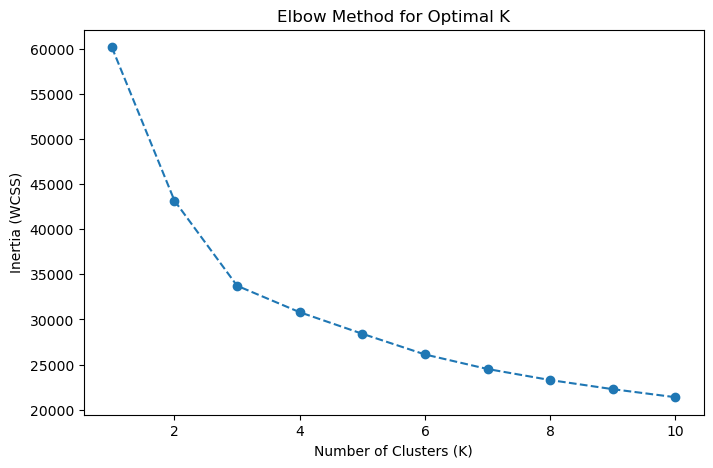

Cluster
1    36235
0    24734
2    14371
3     8788
Name: count, dtype: int64


In [18]:
##---------Type the code below this line------------------##
##----Clustering K-Means Algorithm  -------------##
# Selecting numerical columns
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns

# Scaling numerical features
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Determine the optimal number of clusters using the Elbow Method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df[numerical_cols])
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o", linestyle="--")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.show()

# Apply K-Means clustering with 4 clusters (recommended)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df[numerical_cols])

# Display cluster distribution
print(df["Cluster"].value_counts())

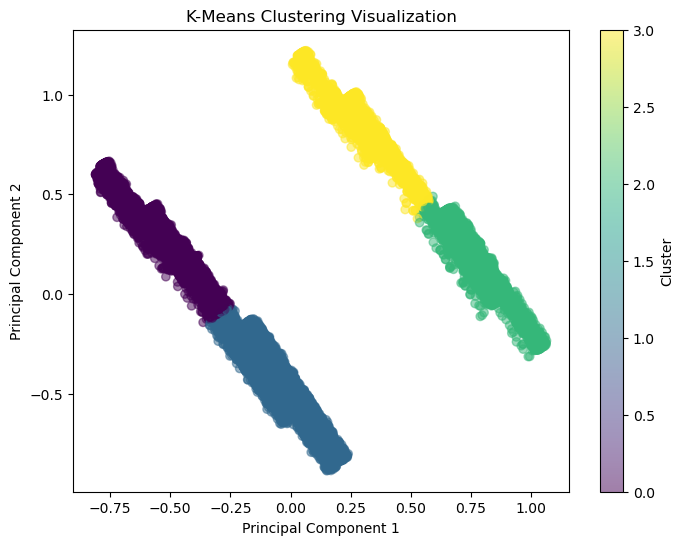

In [19]:
# Visualizing Clusters using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df[numerical_cols])
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df["Cluster"], cmap='viridis', alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering Visualization")
plt.colorbar(label='Cluster')
plt.show()



In [20]:
# Display data in each cluster
for cluster in range(4):
    print(f"\nData for Cluster {cluster}:")
    print(df[df["Cluster"] == cluster].tail(10))


Data for Cluster 0:
        hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
100770      0          0.0   0.031208                0.5                 1.0   
100771      0          0.0   0.031208                0.5                 1.0   
100774      0          0.0   0.071913                0.5                 1.0   
100778      0          0.0   0.071913                0.5                 1.0   
100810      0          0.0   0.009498                0.5                 1.0   
100831      0          0.0   0.240163                0.5                 1.0   
100832      0          0.0   0.234735                0.5                 1.0   
100835      0          0.0   0.023066                0.5                 1.0   
100840      0          0.0   0.145183                0.5                 1.0   
100909      0          0.0   0.420624                0.5                 1.0   

        arrival_date_week_number  arrival_date_day_of_month  \
100770                       1.0   

## ------- K-Mean Clustering Observations: --------------

## -------Elbow Method Analysis ---
The Elbow Method suggests that 4 clusters is a reasonable choice

Cluster 0: Likely business travelers with short stays, fewer special requests, and lower ADR(Average Daily Rate).
Cluster 1: Guests with long lead times, likely family vacationers.
Cluster 2: Last-minute bookers with shorter stays, possibly budget-conscious customers.
Cluster 3: Customers with high ADR and multiple special requests, likely luxury travelers.



In [21]:
##---------Type the code below this line------------------##

## 8. Solution

What is the solution that is proposed to solve the business problem discussed in Section 1. Also share your learnings while working through solving the problem in terms of challenges, observations, decisions made etc.

Score 2 Marks

--------------Type the answers below this line--------------

##---------Type the answer below this line------------------##
## ------- Business Insights: --------------
Hotels can personalize marketing strategies for each segment.
High-value customers (Cluster 3) can be targeted for loyalty programs.
Frequent cancellers (Cluster 1) may require stricter booking policies.
Budget travelers (Cluster 2) can be offered last-minute deals

## -------Improvements --------------
The model performs better at predicting non-cancellations (0) than cancellations (1).
High False Negatives: Many actual cancellations are misclassified as "Not Canceled," which may cause operational issues
Consider adding more predictive features
Try more complex models (e.g., Random Forest, XGBoost) to improve recall without losing precision.

##NOTE
All Late Submissions will incur a penalty of -2 marks. Do ensure on time submission to avoid penalty.

Good Luck!!!